

### 🔹 Definitions:

The cross-correlation of two discrete signals $x(n)$ and $y(n)$ is given by:

$$
r_{xy}(l) = \sum_{n} x(n) \cdot y(n+l)
$$

This is similar to convolution, but **without time-reversal**.

---
To find the **correlation** between discrete-time signals $x(n)$ and $y(n)$, and between $y(n)$ and $z(n)$, we compute the **cross-correlation** of the two sequences.
### Given sequences:

* $x(n) = [1, 3, -2, 4]$
* $y(n) = [2, 3, -1, 3]$
* $z(n) = [2, -1, 4, -2]$

We will compute $r_{xy}(l)$ and $r_{yz}(l)$, for lags $l = -3$ to $3$ (since both sequences are of length 4). <br>
👉 **Tasks:**

1. Find the **correlation between** $x(n)$ & $y(n)$, and $y(n)$ & $z(n)$.
2. **Observe the realization** (plot the correlation results).


---

### 🔹 Step 1: Cross-correlation of $x(n)$ and $y(n)$

Let’s calculate $r_{xy}(l)$ for $l = -3$ to $3$:

We pad with zeros where needed during shifting.

$$
\begin{aligned}
r_{xy}(-3) &= x(0)\cdot y(3) = 1 \cdot 3 = 3 \\
r_{xy}(-2) &= x(0)\cdot y(2) + x(1)\cdot y(3) = 1 \cdot (-1) + 3 \cdot 3 = -1 + 9 = 8 \\
r_{xy}(-1) &= x(0)\cdot y(1) + x(1)\cdot y(2) + x(2)\cdot y(3) = 1 \cdot 3 + 3 \cdot (-1) + (-2) \cdot 3 = 3 -3 -6 = -6 \\
r_{xy}(0)  &= x(0)\cdot y(0) + x(1)\cdot y(1) + x(2)\cdot y(2) + x(3)\cdot y(3) = 1\cdot2 + 3\cdot3 + (-2)\cdot(-1) + 4\cdot3 = 2 + 9 + 2 + 12 = 25 \\
r_{xy}(1)  &= x(1)\cdot y(0) + x(2)\cdot y(1) + x(3)\cdot y(2) = 3\cdot2 + (-2)\cdot3 + 4\cdot(-1) = 6 -6 -4 = -4 \\
r_{xy}(2)  &= x(2)\cdot y(0) + x(3)\cdot y(1) = (-2)\cdot2 + 4\cdot3 = -4 + 12 = 8 \\
r_{xy}(3)  &= x(3)\cdot y(0) = 4\cdot2 = 8 \\
\end{aligned}
$$

So the result:

$$
r_{xy}(l) = [3, 8, -6, 25, -4, 8, 8] \quad \text{for } l = -3 \text{ to } 3
$$

---

### 🔹 Step 2: Cross-correlation of $y(n)$ and $z(n)$

We follow the same method:

$$
\begin{aligned}
r_{yz}(-3) &= y(0)\cdot z(3) = 2\cdot(-2) = -4 \\
r_{yz}(-2) &= y(0)\cdot z(2) + y(1)\cdot z(3) = 2\cdot4 + 3\cdot(-2) = 8 -6 = 2 \\
r_{yz}(-1) &= y(0)\cdot z(1) + y(1)\cdot z(2) + y(2)\cdot z(3) = 2\cdot(-1) + 3\cdot4 + (-1)\cdot(-2) = -2 +12 +2 = 12 \\
r_{yz}(0)  &= y(0)\cdot z(0) + y(1)\cdot z(1) + y(2)\cdot z(2) + y(3)\cdot z(3) = 2\cdot2 + 3\cdot(-1) + (-1)\cdot4 + 3\cdot(-2) = 4 -3 -4 -6 = -9 \\
r_{yz}(1)  &= y(1)\cdot z(0) + y(2)\cdot z(1) + y(3)\cdot z(2) = 3\cdot2 + (-1)\cdot(-1) + 3\cdot4 = 6 +1 +12 = 19 \\
r_{yz}(2)  &= y(2)\cdot z(0) + y(3)\cdot z(1) = (-1)\cdot2 + 3\cdot(-1) = -2 -3 = -5 \\
r_{yz}(3)  &= y(3)\cdot z(0) = 3\cdot2 = 6 \\
\end{aligned}
$$

So the result:

$$
r_{yz}(l) = [-4, 2, 12, -9, 19, -5, 6] \quad \text{for } l = -3 \text{ to } 3
$$

---

### 🔹 Realization Observation:

* **High peak at $r_{xy}(0) = 25$**: This indicates that the sequences $x(n)$ and $y(n)$ are most aligned at $l = 0$, showing strong similarity at zero lag.
* **Negative values**: The presence of significant negative values at other lags (e.g., $r_{xy}(-1) = -6$) indicates inverse relation (opposite signs) at those shifts.
* **Cross-correlation shape**: These values can be plotted to visually observe how similar the sequences are and how they align with each other at different lags.


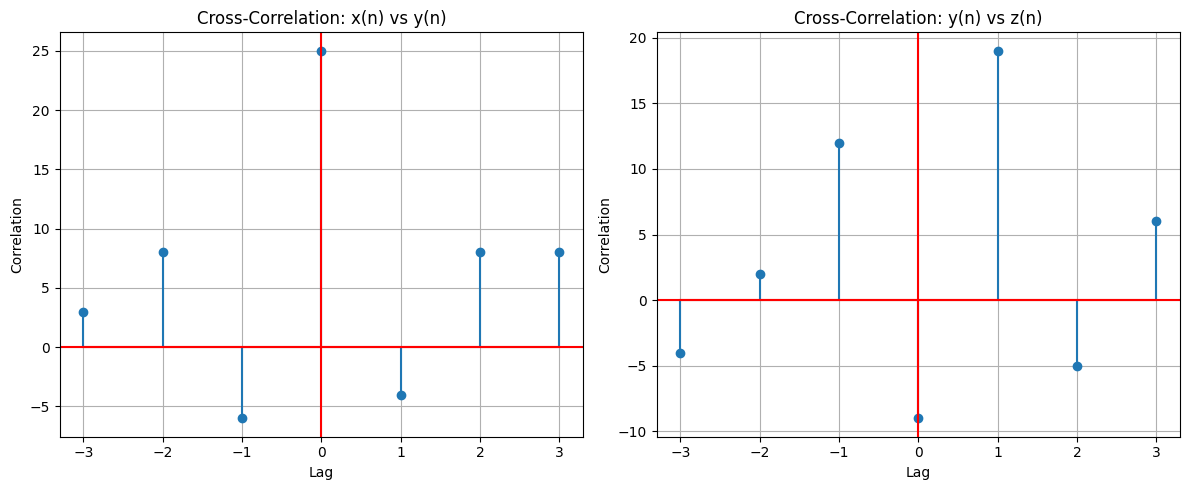

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the discrete-time sequences
x = np.array([1, 3, -2, 4])
y = np.array([2, 3, -1, 3])
z = np.array([2, -1, 4, -2])

# Full cross-correlation gives result from lag = -(N-1) to (N-1)
r_xy = np.correlate(x, y, mode='full')  # correlation between x and y
r_yz = np.correlate(y, z, mode='full')  # correlation between y and z

# Define Lag Ranges
lags = np.arange(-len(x)+1, len(x))  # same for all three (length 4)

#Plot the Results
plt.figure(figsize=(12, 5))

# Plot r_xy
plt.subplot(1, 2, 1)
plt.stem(lags, r_xy, )
plt.title("Cross-Correlation: x(n) vs y(n)")
plt.xlabel("Lag")
plt.axvline(color='red')
plt.axhline(color='red')
plt.ylabel("Correlation")
plt.grid(True)

# Plot r_yz
plt.subplot(1, 2, 2)
plt.stem(lags, r_yz)
plt.title("Cross-Correlation: y(n) vs z(n)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.axvline(color='red')
plt.axhline(color='red')
plt.grid(True)

plt.tight_layout()
plt.show()


